In [1]:
import pandas as pd
import numpy as np
from category_encoders import OneHotEncoder


In [2]:
X = pd.read_csv('../KivaLoans_data/X_matrix2.csv')

# X.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amount             671205 non-null  int64  
 1   activity                671205 non-null  object 
 2   sector                  671205 non-null  object 
 3   country                 671205 non-null  object 
 4   term_in_months          671205 non-null  int64  
 5   lender_count            671205 non-null  int64  
 6   repayment_interval      671205 non-null  object 
 7   PartnerPresent          671205 non-null  int64  
 8   PostedTimeofDay         671205 non-null  int64  
 9   PostedDayofWeek         671205 non-null  object 
 10  NumberofBorrowers       671205 non-null  int64  
 11  PercentFemaleBorrowers  671205 non-null  float64
 12  CountWordsinDesc        671205 non-null  int64  
 13  NumberofTags            671205 non-null  int64  
dtypes: float64(1), int64

In [4]:
y = pd.read_csv('../KivaLoans_data/y_matrix2.csv')

y = y['loan_funded']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier(n_jobs=-1)

In [7]:
# from utils import fit_xgbmodel

In [17]:
ohe = OneHotEncoder()
# X_train = ohe.fit_transform(X_train)

# X_test =ohe.transform(X_test)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469843 entries, 76514 to 487840
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amount             469843 non-null  int64  
 1   activity                469843 non-null  object 
 2   sector                  469843 non-null  object 
 3   country                 469843 non-null  object 
 4   term_in_months          469843 non-null  int64  
 5   lender_count            469843 non-null  int64  
 6   repayment_interval      469843 non-null  object 
 7   PartnerPresent          469843 non-null  int64  
 8   PostedTimeofDay         469843 non-null  int64  
 9   PostedDayofWeek         469843 non-null  object 
 10  NumberofBorrowers       469843 non-null  int64  
 11  PercentFemaleBorrowers  469843 non-null  float64
 12  CountWordsinDesc        469843 non-null  int64  
 13  NumberofTags            469843 non-null  int64  
dtypes: float64(1), i

In [10]:
#fit_xgbmodel(xgb1, X_train, y_train, X_test, y_test)

In [15]:
from sklearn.pipeline import Pipeline

In [11]:
boost_pipe = Pipeline([('ohe', ohe), ('xgbc', xgb1)])

In [12]:
boost_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight

In [13]:
predicts1 = boost_pipe.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [15]:
np.sqrt(mean_squared_error(y_test, predicts1))

0.2026213528725986

In [16]:
rmse_scorer(boost_pipe, X_test, y_test)

-0.2026213528725986

In [17]:
r2_score(y_test, predicts1)

0.39192012897982187

In [18]:
feats1 = boost_pipe.steps[0][1].get_feature_names()
feat_imp1 = pd.Series(boost_pipe.steps[1][1].feature_importances_, index=feats1).sort_values(ascending=False)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Feature')

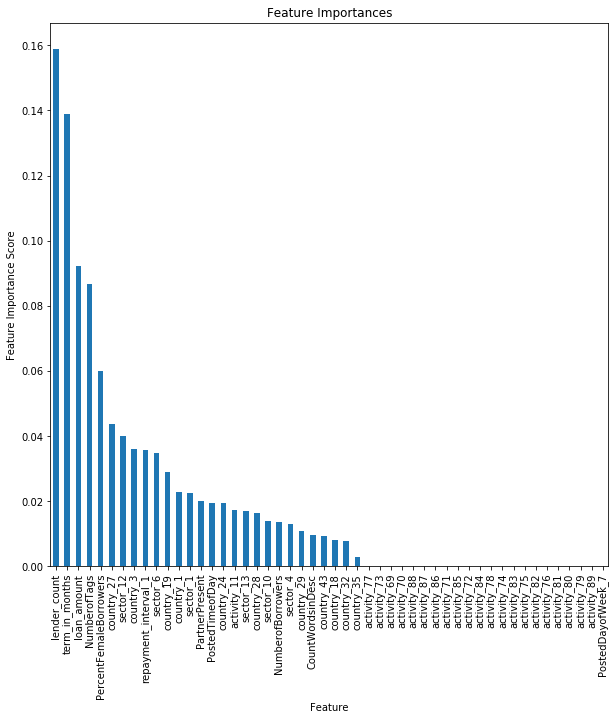

In [20]:
plt.figure(figsize=(10, 10))
feat_imp1[:50].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params1 = {
    'n_estimators' : [100, 300, 500, 750],
    'learning_rate': [0.01, 0.05, 0.75, 0.1, 0.3],
    'max_depth': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

In [ ]:
# gsearch1 = GridSearchCV(xgb1, params1, scoring=rmse_scorer, n_jobs=4, cv=5)

# gsearch1.fit(X_train, y_train)

In [21]:
xgb2 = xgb.XGBClassifier(n_estimators=500, n_jobs=-1)

boost_pipe2= Pipeline([('ohe', ohe), ('xgbc', xgb2)])

In [22]:
boost_pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=500, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight

In [23]:
predicts2 = boost_pipe2.predict(X_test)

In [24]:
pd.Series(predicts2).value_counts()

1    189967
0     11395
dtype: int64

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
boost_pipe.score(X_test, y_test)

0.9589445873600778

In [27]:
boost_pipe2.score(X_test, y_test)

0.9644818784080412

In [28]:
print(classification_report(y_test, predicts1))

print(confusion_matrix(y_test, predicts1))

              precision    recall  f1-score   support

           0       0.84      0.54      0.66     14663
           1       0.96      0.99      0.98    186699

    accuracy                           0.96    201362
   macro avg       0.90      0.77      0.82    201362
weighted avg       0.96      0.96      0.95    201362

[[  7906   6757]
 [  1510 185189]]


Text(0.5, 51.0, 'Actual Class')

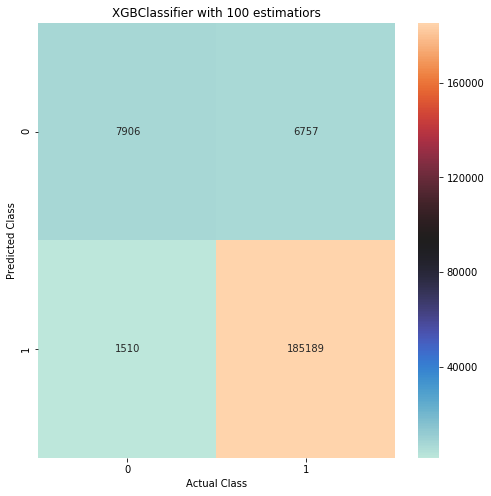

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, predicts1), annot=True, cmap='icefire', fmt='d')
plt.title('XGBClassifier with 100 estimatiors')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')

In [30]:
print(classification_report(y_test, predicts2))

print(confusion_matrix(y_test, predicts2))

              precision    recall  f1-score   support

           0       0.83      0.64      0.73     14663
           1       0.97      0.99      0.98    186699

    accuracy                           0.96    201362
   macro avg       0.90      0.82      0.85    201362
weighted avg       0.96      0.96      0.96    201362

[[  9453   5210]
 [  1942 184757]]


Text(0.5, 51.0, 'Actual Class')

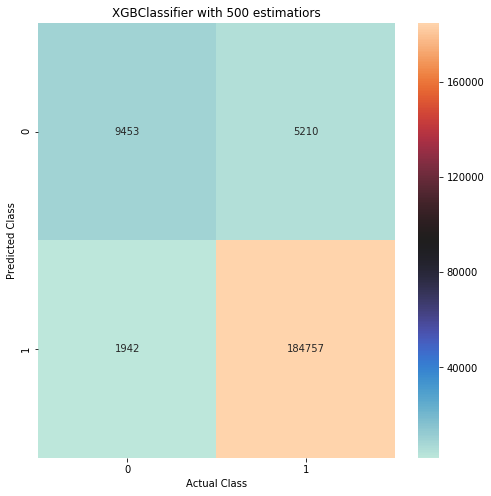

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, predicts2), annot=True, cmap='icefire', fmt='d')
plt.title('XGBClassifier with 500 estimatiors')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')

In [32]:
# sns.cm.colors.get_named_colors_mapping()

In [11]:
import pickle

# with open('xgbc_pipe1.pickle', 'wb') as f:
#     pickle.dump(boost_pipe, f)

In [42]:
# with open('xgbc_pipe2.pickle', 'wb') as f:
#     pickle.dump(boost_pipe2, f)

In [9]:
import utils
from importlib import reload
reload(utils)

<module 'utils' from 'C:\\Users\\afs95\\MyPython\\KivaLoans\\utils.py'>

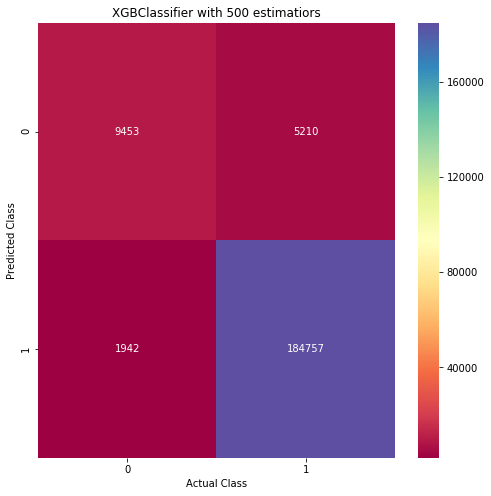

In [36]:
utils.plot_confusion_matrix(y_test, predicts2, cmap='Spectral', title='XGBClassifier with 500 estimatiors')

In [37]:
X_test[predicts2 == 1].index

Int64Index([381059, 307489,  90306,  28761, 362522, 390383, 158842, 515881,
            335120, 654180,
            ...
            522153,  94369, 656487, 455027,  36879,  96200, 438617, 629656,
            121621, 367055],
           dtype='int64', length=189967)

In [38]:
X_test[predicts2 == 0].index

Int64Index([291444, 156436, 499615, 512596, 462671, 624763,   7700, 110521,
            667916, 295718,
            ...
            655794, 658938, 443422, 655781,  54936, 178830, 134849, 414891,
            387243, 267734],
           dtype='int64', length=11395)

In [12]:
load_model = pickle.load(open('xgbc_pipe2.pickle', 'rb'))

In [13]:
load_model

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               n_estimators=500, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=

In [18]:
xgb3 = xgb.XGBClassifier(n_estimators=750, learning_rate=0.01, n_jobs=-1)

boost_pipe3 = Pipeline([('ohe', ohe), ('xgbc', xgb3)])

In [19]:
boost_pipe3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'repayment_interval', 'PostedDayofWeek'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=750, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weigh

In [20]:
boost_pipe3.score(X_test, y_test)

0.9575143274302004

In [21]:
predicts3 = boost_pipe3.predict(X_test)

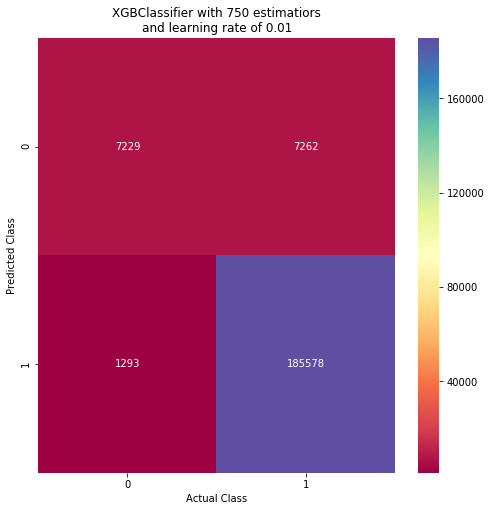

In [22]:
utils.plot_confusion_matrix(y_test, predicts3, cmap='Spectral', title='XGBClassifier with 750 estimatiors\nand learning rate of 0.01')

In [23]:
with open('xgbc_pipe3.pickle', 'wb') as f:
     pickle.dump(boost_pipe3, f)